In [2]:
# import libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

In [3]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [4]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [5]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [6]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [7]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from tensorflow.keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

In [8]:
# Write some code to investigate the dataset. 
count = 0
for line in negative:
    if line != "/n":
        count += 1

count1 = 0
for lines in positive:
    if lines != "/n":
        count1 += 1

print("Total number of negative reviews", count)
print("Total number of positive reviews", count1)
print("Total number of reviews", count + count1)

Total number of negative reviews 921
Total number of positive reviews 872
Total number of reviews 1793


Mean = 30.965
Standard Deviation = 17.016567126726507 


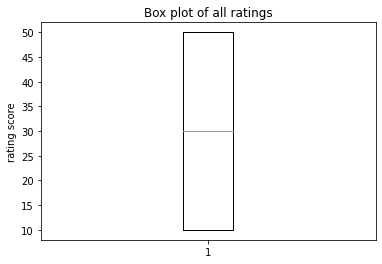

In [9]:
# - Calculate and report the mean review size, its standard deviation and create a boxplot.
def load_data_rating(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    rating = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<rating>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                rating.append(theline)            
            
    return rating

positive_rating = load_data_rating(positive_file)
negative_rating = load_data_rating(negative_file)


rating = positive_rating + negative_rating

for i in range(0, len(rating)):
    rating[i] = int(rating[i])

    
import statistics
mean = statistics.mean(rating)

print("Mean =", mean)
print("Standard Deviation = % s " % (statistics.stdev(rating)))

# Creating plot
plt.boxplot(rating)
plt.title("Box plot of all ratings")
plt.ylabel("rating score")
plt.xlabel("")
plt.show()

In [10]:
# - Calculate the number of unique words in the dataset

# split the sentences into a list
data1 = " ".join(data).split(" ")

# get all the unique words
unique_words=[]
for i in data1:
     if data1.count(i)==1:
         if i not in unique_words:
             unique_words.append(i)
 
# calculate length of unique words
len(unique_words)

1730

In [11]:
# - Perform any other dataset investigation that you feel would be valuable
print("There are", len(data1), "words in the reviews")

duplicate = len(data1) - len(unique_words)
print("There are", duplicate, "duplicate words" )


There are 7776 words in the reviews
There are 6046 duplicate words


In [12]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Pre-processing

In [138]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length

from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

padded_sentences = tf.keras.preprocessing.sequence.pad_sequences(data, maxlen=4, padding="post")
padded_sentences


array([[  2,  19, 492, 493],
       [830,   4,   2, 831],
       [131,   0,   0,   0],
       ...,
       [ 86,   0,   0,   0],
       [  6, 226,   0,   0],
       [ 45,  52,   0,   0]])

In [137]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.

# create x and y data for the train-test set
pos = []
for i in range(len(positive)):
    pos.append([1,0])    
pos=np.array(pos)

neg = []
for i in range(len(negative)):
    neg.append([0,1])   
neg=np.array(neg)

combine = (pos, neg)

# x and y data for the train-test se
y_data = (np.concatenate(combine))
X_data = pad_sequences(tokenized_data, maxlen=1680, padding="post")

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=0, shuffle=True )
print("X_train shape =",X_train.shape)
print("Y_train shape =",y_train.shape)

X_train shape = (1434, 1680)
Y_train shape = (1434, 2)


In [302]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.


def assess_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = to_class(y_pred)
    y_test = to_class(y_test)    
    return y_pred, y_test
    
    
precision = precision_score(y_test, y_pred)
print('precision score: %f' % precision)
recall = recall_score(y_test, y_pred)
print('recall score: %f' % recall)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
print("\n")

cm = confusion_matrix(y_test, y_pred)
cm

precision score: 0.504178
recall score: 1.000000
F1 score: 0.670370




array([[  0, 178],
       [  0, 181]], dtype=int64)

Define network architecture

Network architecturethe way in which a deep learning model is structured and more importantly what it’s designed to do, it can be used to determine The model’s accuracy, what the model can predict, what the model expects as input and output and the combination of layers and how data flows through the layers.

Train model

In [328]:
# Build a neural network model
import tensorflow
from tensorflow import keras

from keras.layers.embeddings import Embedding 
from tensorflow.keras import layers

output_dim = 16

model = keras.Sequential()
model.add(Embedding(vocab_size, output_dim))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(32))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, None, 16)          40960     
                                                                 
 dropout_14 (Dropout)        (None, None, 16)          0         
                                                                 
 batch_normalization_13 (Bat  (None, None, 16)         64        
 chNormalization)                                                
                                                                 
 lstm_11 (LSTM)              (None, 32)                6272      
                                                                 
 dense_10 (Dense)            (None, 2)                 66        
                                                                 
Total params: 47,362
Trainable params: 47,330
Non-trainable params: 32
________________________________________________

In [329]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics= ["accuracy"])

Examine performance of model

In [327]:
history = model.fit(X_train, y_train, epochs=5, batch_size=10)
history

Epoch 1/5
144/144 [==============================] - 104s 724ms/step - loss: 0.6932 - accuracy: 0.5056
Epoch 2/5
144/144 [==============================] - 106s 734ms/step - loss: 0.6941 - accuracy: 0.5049
Epoch 3/5
144/144 [==============================] - 107s 745ms/step - loss: 0.6935 - accuracy: 0.5153
Epoch 4/5
144/144 [==============================] - 104s 725ms/step - loss: 0.6925 - accuracy: 0.5202
Epoch 5/5
144/144 [==============================] - 111s 772ms/step - loss: 0.6932 - accuracy: 0.5132


Plot graphs for accuracy and loss

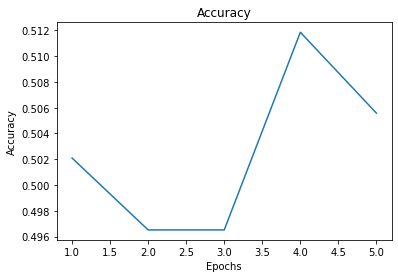

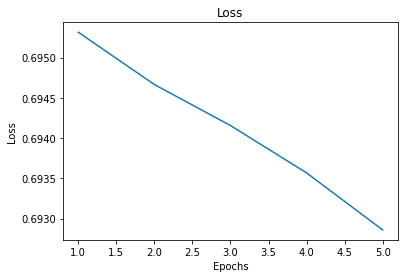

In [323]:
acc = history.history['accuracy']
epochs = range(1,6)
plt.plot(epochs, acc)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

loss = history.history['loss']
epochs = range(1,6)
plt.plot(epochs, loss)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Make a prediction

In [340]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=4)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.

predictions = model.predict(padded)
predictions = to_word_label(predictions)
predictions



['negative', 'negative', 'negative', 'negative', 'negative']